In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# K means Clustering 


In [2]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('sample_data_intw.csv')
dataset = dataset.iloc[:,3:-2]

#X = dataset.iloc[:, [:, -1]].values
# y = dataset.iloc[:, 3].values



In [3]:
dataset.head()

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   daily_decr30          209593 non-null  float64
 1   daily_decr90          209593 non-null  float64
 2   rental30              209593 non-null  float64
 3   rental90              209593 non-null  float64
 4   last_rech_date_ma     209593 non-null  float64
 5   last_rech_date_da     209593 non-null  float64
 6   last_rech_amt_ma      209593 non-null  int64  
 7   cnt_ma_rech30         209593 non-null  int64  
 8   fr_ma_rech30          209593 non-null  float64
 9   sumamnt_ma_rech30     209593 non-null  float64
 10  medianamnt_ma_rech30  209593 non-null  float64
 11  medianmarechprebal30  209593 non-null  float64
 12  cnt_ma_rech90         209593 non-null  int64  
 13  fr_ma_rech90          209593 non-null  int64  
 14  sumamnt_ma_rech90     209593 non-null  int64  
 15  

In [5]:
dataset.corr()

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
daily_decr30,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362
fr_ma_rech30,-0.000577,-0.000343,-0.001219,-0.000503,-0.001629,0.001158,0.002876,0.001669,1.000000,0.000714,...,0.002666,0.002470,-0.001100,-0.000331,0.003368,0.002634,-0.001890,-0.001292,0.001455,0.000998
sumamnt_ma_rech30,0.636536,0.603886,0.272649,0.259709,0.002105,0.000046,0.440821,0.656986,0.000714,1.000000,...,0.491864,0.531079,0.001633,-0.034460,0.009419,0.484761,0.257705,-0.042244,0.000112,-0.012596


In [6]:
dataset.columns

Index(['daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [7]:
smallds = dataset[['daily_decr90','rental90','last_rech_amt_ma','sumamnt_ma_rech90','cnt_da_rech90','cnt_loans90','amnt_loans90','payback90']]

In [8]:
smallds.head()

,daily_decr90,rental90,last_rech_amt_ma,sumamnt_ma_rech90,cnt_da_rech90,cnt_loans90,amnt_loans90,payback90
0,3065.150000,260.13,1539,3078,0,2.0,12,29.000000
1,12124.750000,3691.26,5787,5787,0,1.0,12,0.000000
2,1398.000000,900.13,1539,1539,0,1.0,6,0.000000
3,21.228000,159.42,947,947,0,2.0,12,0.000000
4,150.619333,1098.90,2309,23496,0,7.0,42,2.333333


In [9]:
smallds.corr()

,daily_decr90,rental90,last_rech_amt_ma,sumamnt_ma_rech90,cnt_da_rech90,cnt_loans90,amnt_loans90,payback90
daily_decr90,1.000000,0.471730,0.264131,0.768817,0.031155,0.009446,0.567204,0.040800
rental90,0.471730,1.000000,0.121416,0.360601,0.056282,0.005141,0.327436,0.099501
last_rech_amt_ma,0.264131,0.121416,1.000000,0.418735,0.014779,0.000093,0.014067,-0.014260
sumamnt_ma_rech90,0.768817,0.360601,0.418735,1.000000,0.012465,0.011306,0.562609,-0.029997
cnt_da_rech90,0.031155,0.056282,0.014779,0.012465,1.000000,0.000907,0.020909,0.024046
cnt_loans90,0.009446,0.005141,0.000093,0.011306,0.000907,1.000000,0.017697,-0.000476
amnt_loans90,0.567204,0.327436,0.014067,0.562609,0.020909,0.017697,1.000000,0.029653
payback90,0.040800,0.099501,-0.014260,-0.029997,0.024046,-0.000476,0.029653,1.000000


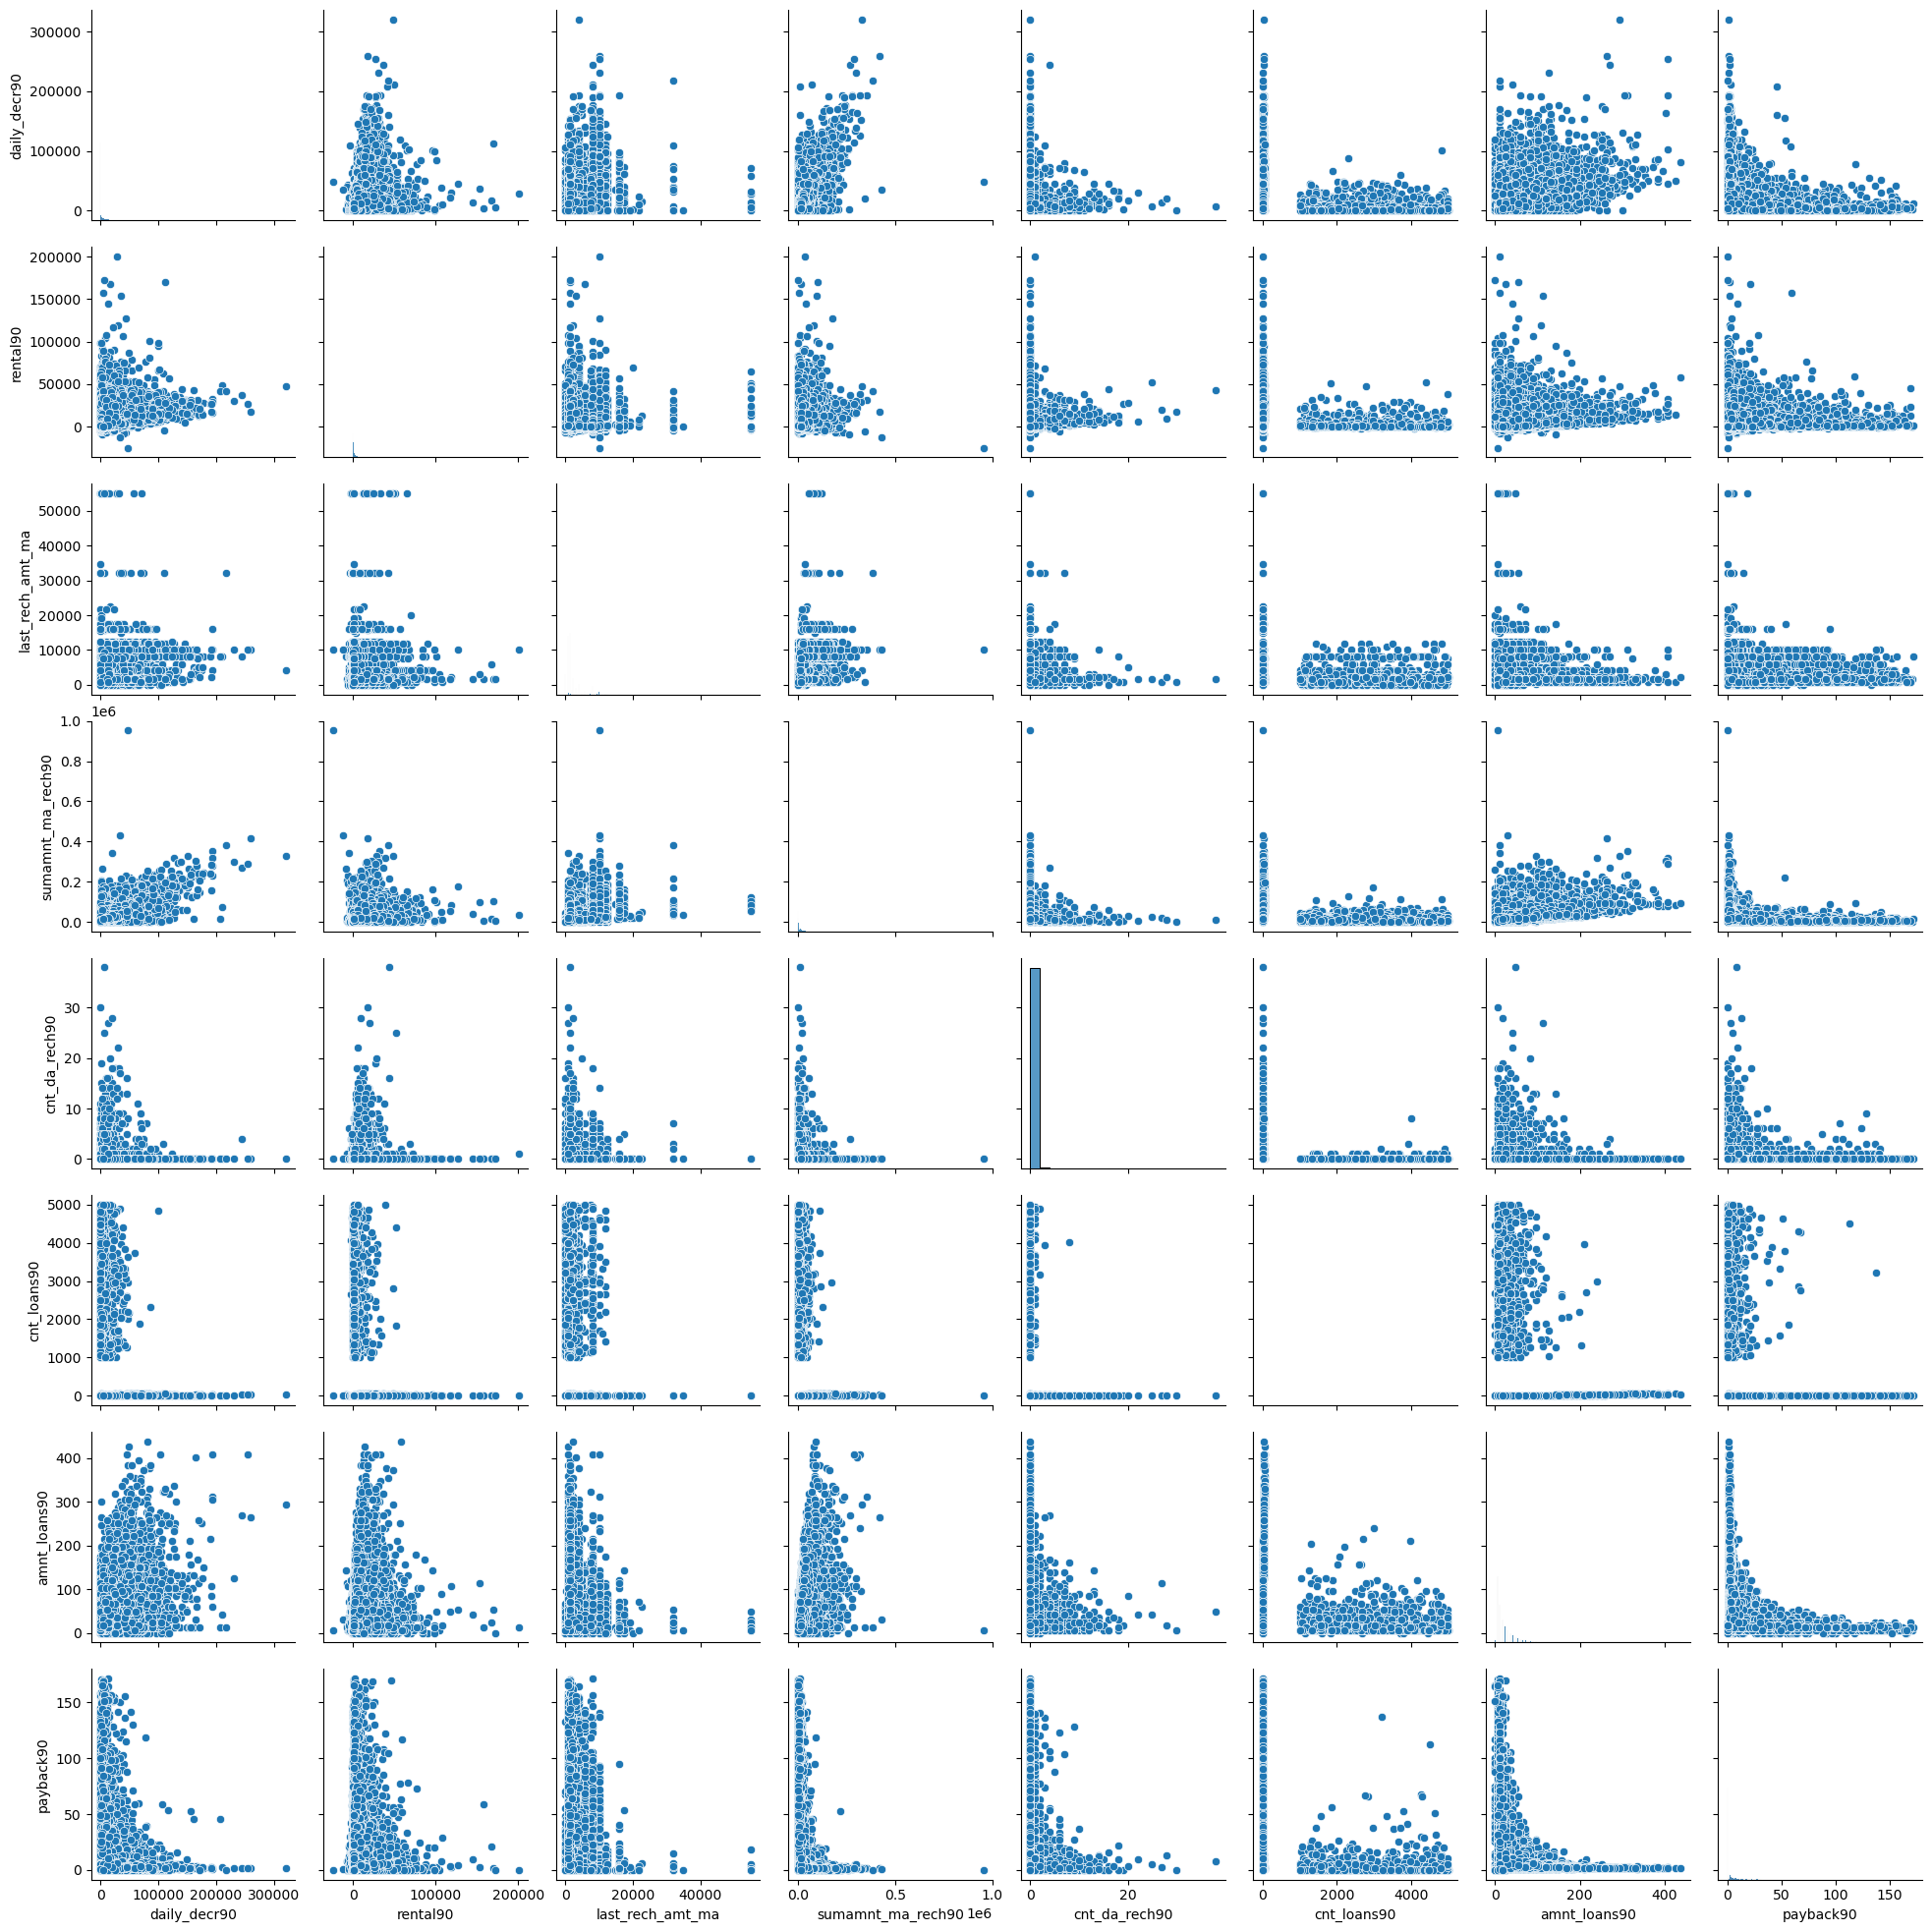

In [10]:
sns.pairplot(smallds)

In [11]:
smallds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   daily_decr90       209593 non-null  float64
 1   rental90           209593 non-null  float64
 2   last_rech_amt_ma   209593 non-null  int64  
 3   sumamnt_ma_rech90  209593 non-null  int64  
 4   cnt_da_rech90      209593 non-null  int64  
 5   cnt_loans90        209593 non-null  float64
 6   amnt_loans90       209593 non-null  int64  
 7   payback90          209593 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 12.8 MB


In [12]:
smalldshm = smallds.iloc[0:2000,:]
smalldshm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   daily_decr90       2000 non-null   float64
 1   rental90           2000 non-null   float64
 2   last_rech_amt_ma   2000 non-null   int64  
 3   sumamnt_ma_rech90  2000 non-null   int64  
 4   cnt_da_rech90      2000 non-null   int64  
 5   cnt_loans90        2000 non-null   float64
 6   amnt_loans90       2000 non-null   int64  
 7   payback90          2000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 125.1 KB


In [13]:
fig, ax = plt.subplots(figsize=(10,10))  
#sns.heatmap(smalldshm, annot=True, linewidths=.5, ax=ax)

In [14]:
X = smallds.values

C:\Users\Blaq_Jesus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Blaq_Jesus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Blaq_Jesus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Blaq_Jesus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Blaq_Jesus\anaconda3\lib\si

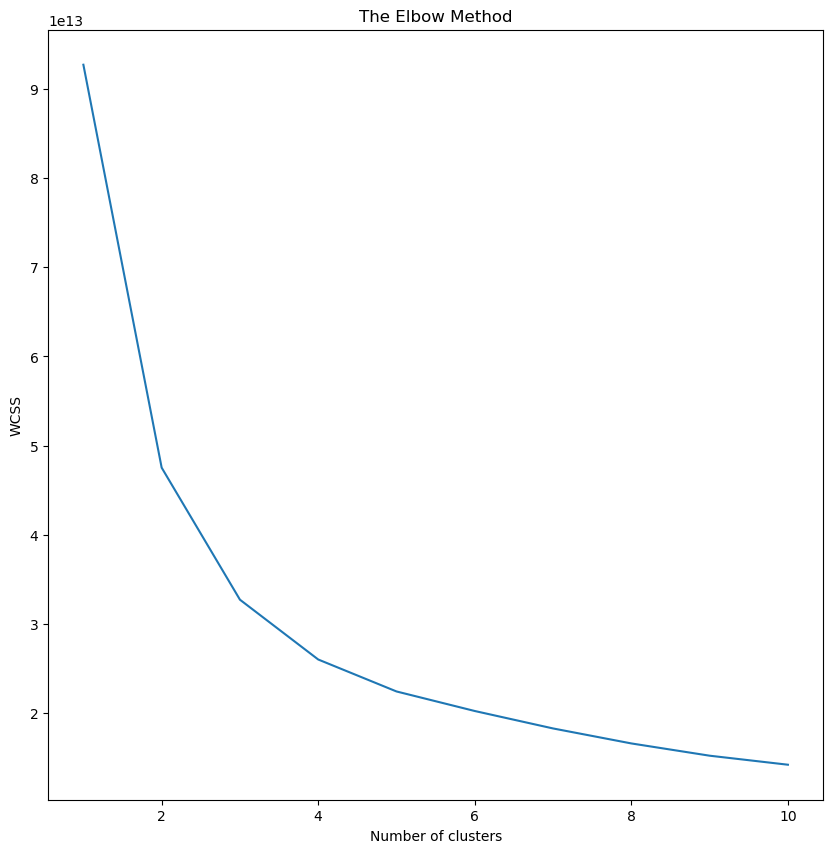

In [15]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [16]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\Blaq_Jesus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
kmeans.cluster_centers_

array([[3.88143321e+04, 1.14497020e+04, 4.87750191e+03, 6.79571180e+04,
        4.69238790e-02, 2.52929980e+01, 7.24462982e+01, 2.64048442e+00],
       [1.20140044e+03, 1.65891308e+03, 1.39488348e+03, 3.88779614e+03,
        3.12625884e-02, 1.66665167e+01, 1.27508234e+01, 4.15437021e+00],
       [2.02214048e+04, 8.35363255e+03, 3.52603439e+03, 3.37351571e+04,
        5.69128923e-02, 2.44067967e+01, 5.24066295e+01, 3.72300747e+00],
       [8.15235870e+04, 1.51805497e+04, 6.43446909e+03, 1.47717251e+05,
        4.97311828e-02, 3.12016602e+01, 9.30161290e+01, 2.00360230e+00],
       [7.46344991e+03, 4.82031603e+03, 2.68875528e+03, 1.61584736e+04,
        5.83316815e-02, 1.96524102e+01, 3.16283135e+01, 5.13457548e+00]])

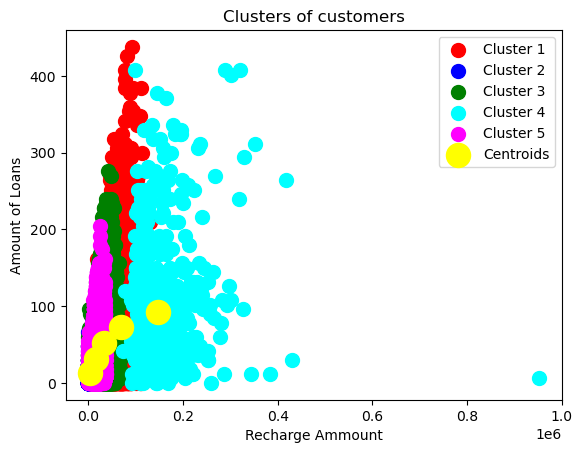

In [18]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 3], X[y_kmeans == 0, 6], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 3], X[y_kmeans == 1, 6], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 3], X[y_kmeans == 2, 6], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 3], X[y_kmeans == 3, 6], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 3], X[y_kmeans == 4, 6], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 6], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Recharge Ammount')
plt.ylabel('Amount of Loans')
plt.legend()
plt.show()